# Worksheet 12

Name:  Azad Ellafi
UID: U19478001

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes
2. No
3. No
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

To set up a dataset for machine learning and assess model performance on unseen data, follow these steps: Collect and preprocess the data, split it into training, validation, and test sets, choose and train a model, evaluate it on the validation set, assess its performance on the test set, and monitor and update as needed for deployment.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and validation data. It indicates that the model cannot learn the training data effectively. On the other hand, overfitting happens when a model is overly complex and fits the training data too closely, capturing noise instead of the actual patterns. Signs of overfitting include excellent performance on the training data but a significant drop in performance on the validation data, revealing the model's inability to generalize to unseen data effectively.

### K Nearest Neighbors

In [33]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

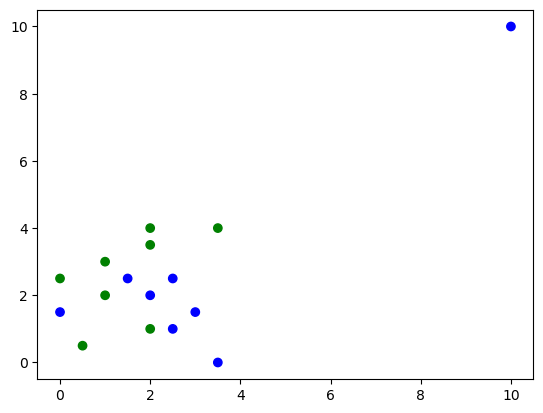

In [34]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

the point at (10, 10) is an outlier

In [35]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

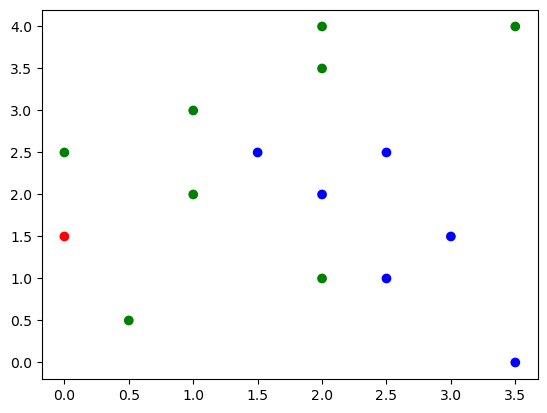

In [36]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Maybe the point at (0, 1.5)

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

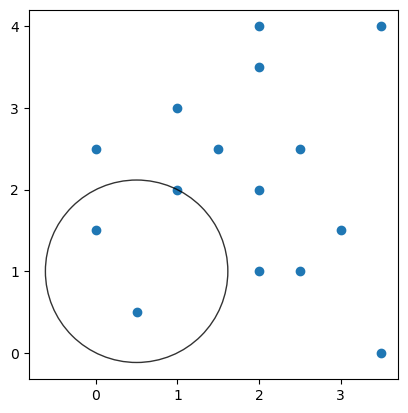

In [37]:
def n_closest_to(example, n):
    distances = [] 
    for i in range(len(data["Attribute A"])):
        point = (data["Attribute A"][i], data["Attribute B"][i])
        dist = np.linalg.norm(np.array(example) - np.array(point))
        distances.append((dist, i))

    distances.sort(key=lambda x: x[0])
    closest_indices = [idx for _, idx in distances[:n]] 

    # Find the distance of the farthest of the three closest points
    farthest_distance = distances[n - 1][0]

    return farthest_distance, closest_indices    

    
location = (0.5 , 1)
radius, _ = n_closest_to(location, 3)

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], label='Data')
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [38]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

def majority(points):
    class_counts = {0: 0, 1: 0} 
    for idx in points:
        class_label = data["Class"][idx]
        class_counts[class_label] += 1

    # Determine the majority class, breaking ties with the default class (e.g., 0)
    majority_class = max(class_counts, key=class_counts.get)
    return majority_class

_, closest_indices = n_closest_to(location, 3)

# Determine the majority class among the three closest points
assigned_class = majority(closest_indices)

print("Assigned Class:", assigned_class)

Assigned Class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [39]:
count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    training_set = [(data["Attribute A"][j], data["Attribute B"][j]) for j in range(len(data["Class"])
) if j != i]
    
    _, closest_indices = n_closest_to((data["Attribute A"][i], data["Attribute B"][i])
, 3)
    
    prediction = majority(closest_indices)
    if prediction == actual_class:
        count += 1

        
accuracy = count / len(data["Class"])
print("overall accuracy = ", accuracy)

overall accuracy =  0.8
